In [1]:
%cd ..

d:\work\vk\task\random-network-path


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from env.network import StohasticNetwork
from agent.path_solver import PathSolver
from utils.input import parse_input
from utils.graph import Graph

In [3]:
input = 'input/input.txt'
logs = 'logs/agent.log'

SEED = 0

In [4]:
n, start_node, finish_node, edges_params = parse_input(input)

network = StohasticNetwork(n, start_node, finish_node, edges_params, SEED)
min_time, min_path = network.get_shortest_path()
min_time, min_path

(13.45481218527588, [0, 2, 3, 5])

In [5]:
def request_fn(path):
    res = network(path)
    total_time_hist.append(sum(res))
    return res

total_time_hist = []
graph = network.get_graph()
path_solver = PathSolver(Graph(**graph), request_fn, max_explore_steps=5000)
path_solver.solve_path(stop_after_expore=True)
with open(logs, 'w') as f:
    for t in total_time_hist: f.write(f'{t}\n')

 23%|██▎       | 1139/5000 [00:01<00:03, 1110.56it/s]

stopping after 1139 step


In [6]:
ts = np.loadtxt(logs, dtype=np.float32, delimiter='\n')
ts.shape

(1139,)

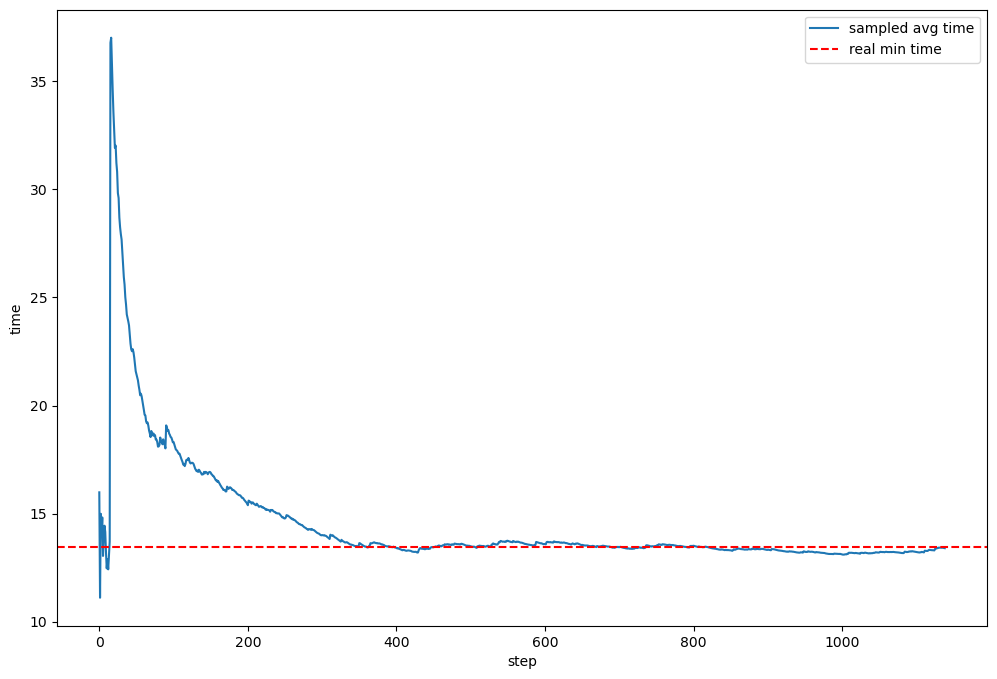

In [7]:
plt.figure(figsize=(12, 8))
plt.xlabel('step')
plt.ylabel('time')
plt.plot([ts[:i+1].mean() for i in range(len(ts))], label='sampled avg time')
plt.axhline(y=min_time, color='r', linestyle='dashed', label='real min time')
plt.legend()
plt.show()